## RGB composite

In [1]:
import earthkit.data
import earthkit.plots
import cartopy.crs as ccrs

In [2]:
data = earthkit.data.from_source(
    "mars",
    **{
        'channel': '3/2/1',
        'class': 'od',
        'date': -1,
        'ident': '71',
        'instrument': '210',
        'param': '260512',
        'step': '12',
        'stream': 'oper',
        'time': '00:00:00',
        'type': 'ssd',
        'grid': "0.25/0.25",
    },
)

In [3]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,cdrfl,None,None,20250217,0,12,ssd,None,regular_ll
1,ecmf,cdrfl,None,None,20250217,0,12,ssd,None,regular_ll
2,ecmf,cdrfl,None,None,20250217,0,12,ssd,None,regular_ll


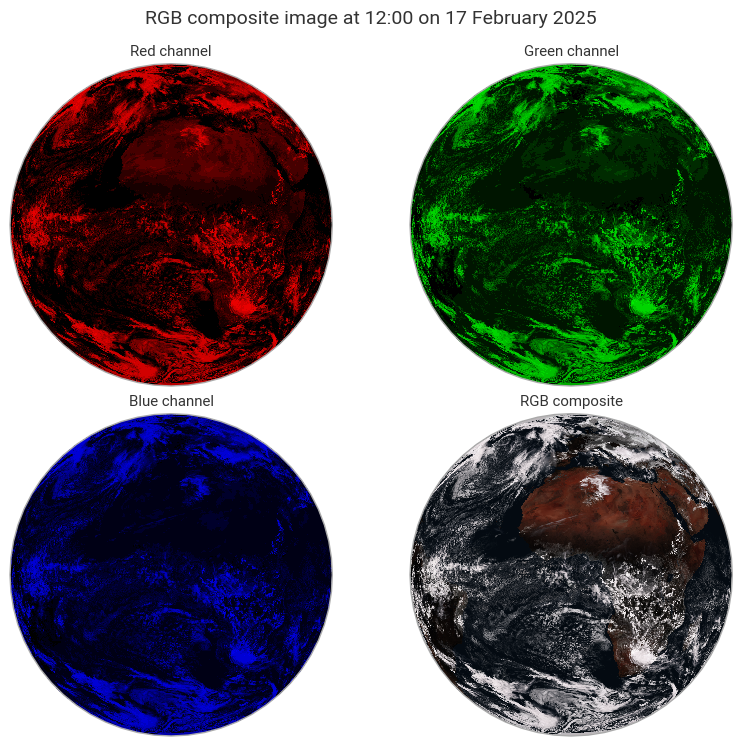

In [4]:
COLORS = {
    "red":   (1, 0, 0),
    "green": (0, 1, 0),
    "blue":  (0, 0, 1),
}

figure = earthkit.plots.Figure(crs=ccrs.NearsidePerspective(), rows=2, columns=2)

for i, color in enumerate(COLORS):
    channel_plot = figure.add_map()
    channel_plot.grid_cells(data[i], colors=["black", COLORS[color]])
    channel_plot.title(f"{color} channel")

composite = figure.add_map()
composite.rgb_composite(data)
composite.title("RGB composite")

figure.title("RGB composite image at {time:%H:%M on %-d %B %Y}")

figure.show()